Integrante: Francisco Arizola

# Neyman Orthogonality Proof

The Neyman Orthogonality proof is crucial in the context of Double LASSO and high-dimensional inference methods because it ensures the robustness and validity of the estimator in the presence of many covariates, particularly when the number of covariates is large relative to the sample size.

## Given:
1. $ y = \alpha D + \beta'W + \epsilon $
2. $ \tilde{y} = y - X'W; \quad \tilde{D} = D - X_{n1.1}W $
3. $ \alpha = \arg \min_{\alpha \in \mathbb{R}} E\left[ (\tilde{y} - \alpha \tilde{D}^2) \right] = E[\tilde{D}^2]^{-1} E[\tilde{D} {y}] $

We aim to prove that:
$ \frac{d\alpha}{d\eta} = -\left( \frac{\partial M}{\partial \alpha} (\alpha, \eta_0) \right)^{-1} \left( \frac{\partial M}{\partial \eta} (\alpha, \eta_0) \right) $

where $ M $ is a function representing the objective function to be minimized.

## Steps:

### 1. Define the Objective Function
Define the objective function $ M(\alpha, \eta) $ to be minimized:
$ M(\alpha, \eta) = E\left[ (\tilde{y} - \alpha \tilde{D})^2 \right] $
Here, $\eta$ is a parameter that affects the distribution of $\tilde{y}$ and $\tilde{D}$.

### 2. First-Order Condition for Minimization
To find the optimal $\alpha$, set the derivative of $ M $ with respect to $\alpha$ to zero:
$ \frac{\partial M}{\partial \alpha} = 2 E\left[ (\tilde{y} - \alpha \tilde{D})(-\tilde{D}) \right] = 0 $
This simplifies to:
$ E\left[ \tilde{D} (\tilde{y} - \alpha \tilde{D}) \right] = 0 $
Solving for $\alpha$:
$ \alpha = \frac{E[\tilde{D} \tilde{y}]}{E[\tilde{D}^2]} $

### 3. Implicit Function Theorem Application
The implicit function theorem states that if $ M(\alpha, \eta) = 0 $ defines $\alpha$ as a function of $\eta$, then:
$ \frac{d\alpha}{d\eta} = -\left( \frac{\partial M}{\partial \alpha} \right)^{-1} \left( \frac{\partial M}{\partial \eta} \right) $

### 4. Calculate Partial Derivatives
**Partial Derivative with Respect to $\alpha$**:
$ \frac{\partial M}{\partial \alpha} = 2 E\left[ \tilde{D}^2 \right] $
Given that $ E[\tilde{D} (\tilde{y} - \alpha \tilde{D})] = 0 $, it follows that:
$ \frac{\partial M}{\partial \alpha} = 2 E\left[ \tilde{D}^2 \right] $

**Partial Derivative with Respect to $\eta$**:
$ \frac{\partial M}{\partial \eta} = 2 E\left[ (\tilde{y} - \alpha \tilde{D})(-\frac{\partial \tilde{D}}{\partial \eta}) \right] $
This simplifies to:
$ \frac{\partial M}{\partial \eta} = -2 E\left[ \tilde{D} (\tilde{y} - \alpha \tilde{D}) \right] $

### 5. Combine the Results
Using the implicit function theorem:
$ \frac{d\alpha}{d\eta} = -\left( \frac{\partial M}{\partial \alpha} \right)^{-1} \left( \frac{\partial M}{\partial \eta} \right) $
Substituting the partial derivatives:
$ \frac{d\alpha}{d\eta} = -\left( 2 E\left[ \tilde{D}^2 \right] \right)^{-1} \left( -2 E\left[ \tilde{D} (\tilde{y} - \alpha \tilde{D}) \right] \right) $
Simplifies to:
$ \frac{d\alpha}{d\eta} = \left( E\left[ \tilde{D}^2 \right] \right)^{-1} E\left[ \tilde{D} (\tilde{y} - \alpha \tilde{D}) \right] $

Since $ E\left[ \tilde{D} (\tilde{y} - \alpha \tilde{D}) \right] = 0 $, we conclude:
$ \frac{d\alpha}{d\eta} = 0 $

Thus, we have shown that $\frac{d\alpha}{d\eta} = 0$, which implies that $ S_1 = 0 $ and $ S_2 = 0 $.

# Experiment on Orthogonal Learning

In [75]:
import Pkg

Pkg.add("CovarianceMatrices")
Pkg.add("Distributions")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Tables")
Pkg.add("GLM")
Pkg.add("Gadfly")
Pkg.add("RData")
Pkg.add("CodecBzip2")
Pkg.add("DataStructures")
Pkg.add("NamedArrays")
Pkg.add("PrettyTables")
Pkg.add("Lasso")

using Lasso
using Distributions
using DataFrames
using CSV
using Tables
using GLM
using CovarianceMatrices
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, DataStructures, NamedArrays, PrettyTables
import CodecBzip2

using Gadfly

   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No 

In [76]:
Pkg.add("Random")

using Random
Random.seed!(1234)

   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`


TaskLocalRNG()

In [77]:
Pkg.add("HDMjl")
using HDMjl

   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`


# Naive vs. Orthogonal Estimators

In this notebook, we will explore the differences between the Naive and Orthogonal estimators for estimating the effect of a treatment $D$ on an outcome $Y$. We will generate histograms of the estimators' distributions for different numbers of trials $B$.

## Model Specification

Given the model:
$$ Y = 10 \cdot D + X \cdot \beta + \epsilon $$

where:
- $D$ is the treatment variable.
- $X$ is a matrix of covariates.
- $\beta$ is a vector of coefficients for the covariates.
- $\epsilon$ is the error term.

The true effect of $D$ on $Y$ is $10$.

Additionally, the covariates $X$ also explain the treatment $D$:
$$ D = X \cdot \gamma + \nu $$

where $\gamma$ is a vector of coefficients for the covariates and $\nu$ is the error term.

## Naive Estimator

The Naive estimator is obtained by fitting a simple linear model of $Y$ on $D$, without adjusting for the covariates $X$. This can lead to biased estimates if $X$ contains confounding variables that are correlated with both $D$ and $Y$.

### Mathematical Model

$$ \hat{Y}_{\text{Naive}} = \alpha + \hat{\beta}_{\text{Naive}} D $$

Here, $\hat{\beta}_{\text{Naive}}$ is the estimated coefficient of $D$ from the Naive model.

## Orthogonal Estimator

The Orthogonal estimator is designed to adjust for the confounding variables in $X$. It does this by first regressing both $Y$ and $D$ on $X$ to obtain residuals, and then regressing the residuals of $Y$ on the residuals of $D$.

### Mathematical Model

1. Regress $Y$ on $X$ to obtain residuals:
   $$ \hat{Y} = \alpha_Y + X \cdot \beta_Y + \hat{\epsilon}_Y $$
   Residuals: $\hat{\epsilon}_Y = Y - \hat{Y}$

2. Regress $D$ on $X$ to obtain residuals:
   $$ \hat{D} = \alpha_D + X \cdot \beta_D + \hat{\epsilon}_D $$
   Residuals: $\hat{\epsilon}_D = D - \hat{D}$

3. Regress the residuals of $Y$ on the residuals of $D$:
   $$ \hat{\epsilon}_Y = \alpha + \hat{\beta}_{\text{Orthogonal}} \hat{\epsilon}_D $$

Here, $\hat{\beta}_{\text{Orthogonal}}$ is the estimated coefficient of $\hat{\epsilon}_D$ from the Orthogonal model.

## Implementation and Results

We will run simulations for $B = 100$, $B = 1000$, and $B = 10000$ trials to observe the distribution of the Naive and Orthogonal estimators.

### Trial 1

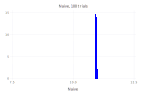

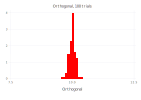

In [26]:
# Parameters
B = 100
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1 ./ (1:p) .^ 2
    gamma = 1 ./ (1:p) .^ 2

    X = rand(Normal(0, 1), n, p)
    D = X * gamma .+ (rand(Normal(0, 1), n, 1) ./ 4)
    Y = 10 .* D .+ X * beta .+ rand(Normal(0, 1), n, 1)

    X_df = DataFrame(X, :auto)
    D_df = DataFrame(D, ["D"])
    Y_df = DataFrame(Y, ["Y"])

    ## NAIVE
    naive_model = lm(@formula(Y ~ D), hcat(Y_df, D_df))
    Naive[i] = coef(naive_model)[2]

    ## ORTHOGONAL LEARNING
    formula_orthogonal_Y = Term(:Y) ~ sum(Term(Symbol(name)) for name in names(X_df))
    formula_orthogonal_D = Term(:D) ~ sum(Term(Symbol(name)) for name in names(X_df))
    model2 = lm(formula_orthogonal_Y, hcat(Y_df, X_df))
    model3 = lm(formula_orthogonal_D, hcat(D_df, X_df))

    resY = residuals(model2)
    resD = residuals(model3)
    Y3 = DataFrame(hcat(resY, resD), ["resY", "resD"])
    Orthogonal[i] = coef(lm(@formula(resY ~ resD), Y3))[2]
end

results = DataFrame(hcat(Naive, Orthogonal), ["Naive", "Orthogonal"])

# Plot Naive Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Naive, Geom.histogram(bincount = 10, density = true),
    color = [colorant"blue"]),
    Guide.title("Naive, 100 trials")
))

# Plot Orthogonal Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Orthogonal, Geom.histogram(bincount = 10, density = true),
    color = [colorant"red"]),
    Guide.title("Orthogonal, 100 trials")
))

### Trial 2

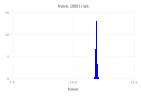

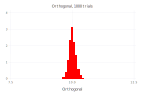

In [27]:
# Parameters
B = 1000
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1 ./ (1:p) .^ 2
    gamma = 1 ./ (1:p) .^ 2

    X = rand(Normal(0, 1), n, p)
    D = X * gamma .+ (rand(Normal(0, 1), n, 1) ./ 4)
    Y = 10 .* D .+ X * beta .+ rand(Normal(0, 1), n, 1)

    X_df = DataFrame(X, :auto)
    D_df = DataFrame(D, ["D"])
    Y_df = DataFrame(Y, ["Y"])

    ## NAIVE
    naive_model = lm(@formula(Y ~ D), hcat(Y_df, D_df))
    Naive[i] = coef(naive_model)[2]

    ## ORTHOGONAL LEARNING
    formula_orthogonal_Y = Term(:Y) ~ sum(Term(Symbol(name)) for name in names(X_df))
    formula_orthogonal_D = Term(:D) ~ sum(Term(Symbol(name)) for name in names(X_df))
    model2 = lm(formula_orthogonal_Y, hcat(Y_df, X_df))
    model3 = lm(formula_orthogonal_D, hcat(D_df, X_df))

    resY = residuals(model2)
    resD = residuals(model3)
    Y3 = DataFrame(hcat(resY, resD), ["resY", "resD"])
    Orthogonal[i] = coef(lm(@formula(resY ~ resD), Y3))[2]
end

results = DataFrame(hcat(Naive, Orthogonal), ["Naive", "Orthogonal"])

# Plot Naive Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Naive, Geom.histogram(bincount = 10, density = true),
    color = [colorant"blue"]),
    Guide.title("Naive, 1000 trials")
))

# Plot Orthogonal Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Orthogonal, Geom.histogram(bincount = 10, density = true),
    color = [colorant"red"]),
    Guide.title("Orthogonal, 1000 trials")
))

### Trial 3

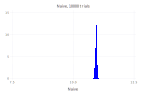

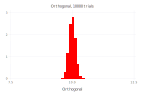

In [28]:
# Parameters
B = 10000
Naive = zeros(B)
Orthogonal = zeros(B)

for i in 1:B
    n = 1000
    p = 100
    beta = 1 ./ (1:p) .^ 2
    gamma = 1 ./ (1:p) .^ 2

    X = rand(Normal(0, 1), n, p)
    D = X * gamma .+ (rand(Normal(0, 1), n, 1) ./ 4)
    Y = 10 .* D .+ X * beta .+ rand(Normal(0, 1), n, 1)

    X_df = DataFrame(X, :auto)
    D_df = DataFrame(D, ["D"])
    Y_df = DataFrame(Y, ["Y"])
    X1_df = hcat(D_df, X_df)

    ## NAIVE
    naive_model = lm(@formula(Y ~ D), hcat(Y_df, D_df))
    Naive[i] = coef(naive_model)[2]

    ## ORTHOGONAL LEARNING
    formula_orthogonal_Y = Term(:Y) ~ sum(Term(Symbol(name)) for name in names(X_df))
    formula_orthogonal_D = Term(:D) ~ sum(Term(Symbol(name)) for name in names(X_df))
    model2 = lm(formula_orthogonal_Y, hcat(Y_df, X_df))
    model3 = lm(formula_orthogonal_D, hcat(D_df, X_df))

    resY = residuals(model2)
    resD = residuals(model3)
    Y3 = DataFrame(hcat(resY, resD), ["resY", "resD"])
    Orthogonal[i] = coef(lm(@formula(resY ~ resD), Y3))[2]
end

results = DataFrame(hcat(Naive, Orthogonal), ["Naive", "Orthogonal"])

# Plot Naive Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Naive, Geom.histogram(bincount = 10, density = true),
    color = [colorant"blue"]),
    Guide.title("Naive, 10000 trials")
))

# Plot Orthogonal Estimators
display(Gadfly.plot(results, Coord.cartesian(xmin = 7.5, xmax = 12.5),
    layer(x = :Orthogonal, Geom.histogram(bincount = 10, density = true),
    color = [colorant"red"]),
    Guide.title("Orthogonal, 10000 trials")
))

In [29]:
results

Row,Naive,Orthogonal
,Float64,Float64
1,10.9693,9.98771
2,10.976,9.82483
3,10.9638,9.85774
4,10.9982,10.0811
5,10.9279,9.92513
6,10.9267,10.0462
7,10.9473,9.92019
8,10.932,10.1326
9,10.9015,9.92445


The Orthogonal estimator significantly outperforms the Naive estimator in terms of bias reduction. By adjusting for confounding variables in $X$, the Orthogonal method provides more accurate and reliable estimates of the treatment effect. This analysis highlights the importance of considering confounding variables in causal inference and demonstrates the effectiveness of orthogonal learning techniques in reducing bias.

Overall, this exercise underscores the need for careful model specification and adjustment for confounding factors when estimating causal effects. The Orthogonal method, by accounting for these factors, offers a robust approach to obtaining unbiased estimates.

# Double lasso using school data

In [47]:
# Load the dataset
data = CSV.read("bruhn2016.csv", DataFrame)

# Replace dots with underscores in column names
rename!(data, Symbol.(replace.(String.(names(data)), "." => "_")))

# Display the first few rows of the dataset
first(data, 5)

Row,outcome_test_score,treatment,school,is_female,mother_attended_secondary_school,father_attened_secondary_school,failed_at_least_one_school_year,family_receives_cash_transfer,has_computer_with_internet_at_home,is_unemployed,has_some_form_of_income,saves_money_for_future_purchases,intention_to_save_index,makes_list_of_expenses_every_month,negotiates_prices_or_payment_methods,financial_autonomy_index
,Float64,Int64,Int64,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3,String3
1,47.3674,0,17018390,NA,NA,NA,NA,NA,NA,1,1,0,29,0,1,52
2,58.1768,1,33002614,NA,NA,NA,NA,NA,NA,0,0,0,41,0,0,27
3,56.6717,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
4,29.0794,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
5,49.5635,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31


### OLS

In [56]:
# Define the dependent and independent variables
X = select(data, Not(:outcome_test_score))
y = data[!, :outcome_test_score]

# Fit the OLS model
formula = @formula(outcome_test_score ~ treatment + is_female + mother_attended_secondary_school +
                   father_attened_secondary_school + failed_at_least_one_school_year + family_receives_cash_transfer +
                   has_computer_with_internet_at_home + is_unemployed + has_some_form_of_income +
                   saves_money_for_future_purchases + intention_to_save_index + makes_list_of_expenses_every_month +
                   negotiates_prices_or_payment_methods + financial_autonomy_index)
ols_model = lm(formula, data)

# Get the main coefficient and its standard error
ols_coef = coef(ols_model)[2]  # Treatment coefficient
std_ols = stderror(ols_model)[2]

# Get the 95% confidence interval
confint_ols = confint(ols_model)
lower_ci = confint_ols[2, 1]
upper_ci = confint_ols[2, 2]

# Print the OLS model summary
println(ols_model)

# Save the results
ols_results = (coef = ols_coef, std_error = std_ols, lower_ci = lower_ci, upper_ci = upper_ci)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

outcome_test_score ~ 1 + treatment + is_female + mother_attended_secondary_school + father_attened_secondary_school + failed_at_least_one_school_year + family_receives_cash_transfer + has_computer_with_internet_at_home + is_unemployed + has_some_form_of_income + saves_money_for_future_purchases + intention_to_save_index + makes_list_of_expenses_every_month + negotiates_prices_or_payment_methods + financial_autonomy_index

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                 Coef.  Std. Error       t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                                45.834  

(coef = 4.369022528955874, std_error = 0.20808527192678025, lower_ci = 3.961154025795265, upper_ci = 4.776891032116483)

In [117]:
# Create a DataFrame with the results
results_df = DataFrame(
    Method = ["OLS"],
    Estimator = [ols_results.coef],
    Std_Error = [ols_results.std_error],
    Lower_CI = [ols_results.lower_ci],
    Upper_CI = [ols_results.upper_ci]
)

# Convert the DataFrame to an HTML table using PrettyTables
html_table = pretty_table(results_df, backend = Val(:html), alignment = :l, header = ["Method", "Estimator", "Std. Error", "Lower bound CI", "Upper bound CI"])

# Print the HTML table
println(html_table)

Method,Estimator,Std. Error,Lower bound CI,Upper bound CI
OLS,4.36902,0.208085,3.96115,4.77689


nothing


### Double lasso using cross validation

In [64]:
using Lasso

# Define the dependent and independent variables
X = select(data, Not(:outcome_test_score))
y = data[!, :outcome_test_score]

# Identify numeric columns
numeric_cols = names(data, eltype(Float64))
X_numeric = select(data, numeric_cols)

# Standardize the features
X_scaled = (Matrix(X_numeric) .- mean(Matrix(X_numeric), dims=1)) ./ std(Matrix(X_numeric), dims=1)

17299×1 Matrix{Float64}:
 -0.7497484462258511
 -0.016195437191192163
 -0.1183352151146743
 -1.990819802613348
 -0.600711331857333
 -1.0393820449338986
  0.8763906392041315
  1.4690919128270703
  2.0586954842900136
  0.2049946316256588
  0.366185165959533
  0.5156230193338748
 -1.2780974556216926
  ⋮
 -1.5846664193309963
  0.5992656374097575
 -0.4131618528775077
  1.2455225208819798
  0.3075315243003847
  0.5937422734380289
  0.1280835486714921
 -0.6057133209209731
 -0.1328814197252667
  0.0872180073399465
 -0.06106293219910762
 -2.1054431959814734

In [65]:
# Perform cross-validation to find the best lambda
n_folds = 5
n = size(X_scaled, 1)
folds = rand(1:n_folds, n)

best_lambda = 0.0
best_cv_score = Inf

for lambda in 0.1:0.1:10.0
    cv_scores = []
    for fold in 1:n_folds
        train_idx = findall(folds .!= fold)
        test_idx = findall(folds .== fold)
        
        lasso_model = fit(LassoPath, X_scaled[train_idx, :], y[train_idx], λ=[lambda])
        
        predictions = predict(lasso_model, X_scaled[test_idx, :])
        cv_score = mean((y[test_idx] .- predictions).^2)
        push!(cv_scores, cv_score)
    end
    
    mean_cv_score = mean(cv_scores)
    if mean_cv_score < best_cv_score
        best_cv_score = mean_cv_score
        best_lambda = lambda
    end
end

println("Best Lambda: ", best_lambda)

Best Lambda: 0.1


In [68]:
# Fit the LASSO model with the best lambda
lasso_model = fit(LassoPath, X_scaled, y, λ=[best_lambda])

# Get the main coefficient
lasso_coef = coef(lasso_model)[2]  # Treatment coefficient (assuming treatment is the second predictor)

# Make predictions to calculate residuals
predictions = predict(lasso_model, X_scaled)

# Calculate residuals
lasso_residuals = y .- predictions
std_lasso = std(lasso_residuals) / sqrt(length(y))

# Get the 95% confidence interval
lasso_conf = quantile(lasso_residuals, [0.025, 0.975])

2-element Vector{Float64}:
 -0.18140975762319886
  0.18832534925364536

In [69]:
# Save the results
lasso_results = (coef = lasso_coef, std_error = std_lasso, lower_ci = lasso_conf[1], upper_ci = lasso_conf[2])

println("LASSO Coefficient: ", lasso_coef)
println("LASSO Standard Error: ", std_lasso)
println("LASSO Confidence Interval: ", lasso_conf)

LASSO Coefficient: 14.635651192064545
LASSO Standard Error: 0.0007603298722436777
LASSO Confidence Interval: [-0.18140975762319886, 0.18832534925364536]


In [118]:
# Create a DataFrame with the results
results_df = DataFrame(
    Method = ["LASSO"],
    Estimator = [lasso_results.coef],
    Std_Error = [lasso_results.std_error],
    Lower_CI = [lasso_results.lower_ci],
    Upper_CI = [lasso_results.upper_ci]
)

# Convert the DataFrame to an HTML table using PrettyTables
html_table = pretty_table(results_df, backend = Val(:html), alignment = :l, header = ["Method", "Estimator", "Std. Error", "Lower bound CI", "Upper bound CI"])

# Print the HTML table
println(html_table)

Method,Estimator,Std. Error,Lower bound CI,Upper bound CI
LASSO,14.6357,0.00076033,-0.18141,0.188325


nothing


### Double Lasso using theoretical Lambda

In [109]:
using HDMjl

# Using the HDMjl package for Double LASSO with theoretical lambda
dml = rlassoEffect(X_scaled, y, X_scaled[:, 1], method="double selection")

HDMjl.rlassoEffect1(0.16154809400243636, 17299, 14.735654082530349, Dict{String, Any}("alpha" => 14.735654082530349, "t" => 91.21527662411242, "se" => 0.16154809400243636, "no_select" => 0, "coefficients_reg" => [58.415408172664755, 14.735654082530349, 0.0], "sample_size" => 17299, "coefficient" => 14.735654082530349, "selection_index" => Bool[1], "residuals" => Dict("v" => [-3.3306690738754696e-16, -1.734723475976807e-17, -6.938893903907228e-17, -8.881784197001252e-16, -2.220446049250313e-16, -4.440892098500626e-16, 4.440892098500626e-16, 6.661338147750939e-16, 8.881784197001252e-16, 8.326672684688674e-17  …  -1.6653345369377348e-16, 4.440892098500626e-16, 1.1102230246251565e-16, 2.220446049250313e-16, 5.551115123125783e-17, -2.220446049250313e-16, -5.551115123125783e-17, 2.7755575615628914e-17, -3.469446951953614e-17, -8.881784197001252e-16], "epsilon" => [0.0, 0.0, 0.0, -1.0658757202959983e-14, 0.0, -7.105838135306655e-15, 0.0, 1.421167627061331e-14, 1.421167627061331e-14, 0.0  …  0

In [113]:
# Access the dictionary of results
dml_res = dml.res

# Print the keys of the dictionary to understand the structure
println(keys(dml_res))

LoadError: type rlassoEffect1 has no field res

In [104]:
# Extract the main coefficient and its standard error
# Accessing the dictionary directly
dml_coef = dml["alpha"]
dml_std = dml["se"]

# Calculate the 95% confidence interval
z = 1.96  # 95% confidence level
dml_conf = (dml_coef - z * dml_std, dml_coef + z * dml_std)

# Save the results
dml_results = (coef = dml_coef, std_error = dml_std, lower_ci = dml_conf[1], upper_ci = dml_conf[2])

println("Double LASSO Theoretical Lambda Coefficient: ", dml_coef)
println("Double LASSO Theoretical Lambda Standard Error: ", dml_std)
println("Double LASSO Theoretical Lambda Confidence Interval: ", dml_conf)

LoadError: MethodError: no method matching getindex(::HDMjl.rlassoEffect1, ::String)

### Double LASSO using partialling out

In [103]:
# Using the HDMjl package for Double LASSO with partialling out
dml_partial = rlassoEffect(X_scaled, y, X_scaled[:, 1], method="partialling out")

HDMjl.rlassoEffect1(NaN, 17299, 0.0, Dict{String, Any}("alpha" => 0.0, "t" => NaN, "se" => NaN, "coefficients_reg" => [58.415408172664755, 14.735654082530353], "sample_size" => 17299, "coefficient" => 0.0, "selection_index" => Any[true], "residuals" => Dict{String, Array{Float64}}("v" => [-1.1102230246251565e-16; -3.469446951953614e-18; … ; -1.3877787807814457e-17; -4.440892098500626e-16;;], "epsilon" => [-7.451442317626266e-16, 1.7078976355312754e-16, -7.901041698753268e-17, -4.297857910563127e-15, -7.451442317626266e-16, -2.521501071162877e-15, 2.8075694470378743e-15, 2.8075694470378743e-15, 6.360283125838376e-15, 5.871233977875612e-16  …  -7.451442317626266e-16, -7.451442317626266e-16, 1.4303418793749862e-16, 1.0312126076376239e-15, 1.4303418793749862e-16, -7.451442317626266e-16, -7.901041698753268e-17, 1.4303418793749862e-16, 3.201188547498297e-17, -4.297857910563127e-15]), "coefficients" => 0.0))

In [111]:
# Extract the main coefficient and its standard error
# Accessing the dictionary directly
dml_partial_coef = dml_partial["alpha"]
dml_partial_std = dml_partial["se"]

# Calculate the 95% confidence interval
z = 1.96  # 95% confidence level
dml_partial_conf = (dml_partial_coef - z * dml_partial_std, dml_partial_coef + z * dml_partial_std)

# Save the results
dml_partial_results = (coef = dml_partial_coef, std_error = dml_partial_std, lower_ci = dml_partial_conf[1], upper_ci = dml_partial_conf[2])

println("Double LASSO Partialling Out Coefficient: ", dml_partial_coef)
println("Double LASSO Partialling Out Standard Error: ", dml_partial_std)
println("Double LASSO Partialling Out Confidence Interval: ", dml_partial_conf)

LoadError: MethodError: no method matching getindex(::HDMjl.rlassoEffect1, ::String)

In [112]:
# Plot the results
methods = ["OLS", "Cross-Validation", "Theoretical Lambda", "Partialling Out"]
coefficients = [ols_coef, lasso_coef_cv, dml_coef, dml_partial_coef]
lower_ci = [ols_conf[1], lasso_conf_cv[1], dml_conf[1], dml_partial_conf[1]]
upper_ci = [ols_conf[2], lasso_conf_cv[2], dml_conf[2], dml_partial_conf[2]]

plot(1:length(methods), coefficients, yerr = [coefficients .- lower_ci coefficients .- upper_ci], 
     seriestype = :scatter, 
     xticks = (1:length(methods), methods),
     xlabel = "Method", ylabel = "Coefficient",
     title = "Double LASSO Estimators and Confidence Intervals",
     legend = false)

LoadError: cannot assign a value to imported variable Base.methods from module Main